In [98]:
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [15]:

with open("ks-projects-201612.csv", 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10KB
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [16]:
df_ks = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')
df_ks

C:\Users\da170\AppData\Local\Temp\ipykernel_16820\399715802.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ks = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN


In [18]:
print(len(df_ks))
print("===========================================================")
null_count = df_ks.isnull().sum()
print("Null values in each column:")
print(null_count)
print("===========================================================")
print(df_ks.dtypes)

323750
Null values in each column:
ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64
ID                  int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal               object
launched           object
pledged            object
state              object
backers            object
country            object
usd pledged        object
Unnamed: 13        object
Unnamed: 14        object
Unnamed: 15        object
Unnamed: 16       float64
dtype: object


In [ ]:
df_database = pd.read_csv(r"database.csv")
df_database

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
print(len(df_database))
print("===========================================================")
null_count = df_database.isnull().sum()
print("Null values in each column:")
print(null_count)
print("===========================================================")
print(df_database.dtypes)
print("===========================================================")


23412
Null values in each column:
Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64
Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth  

In [23]:
df_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [35]:
df_database['Date'].str.len().value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

In [37]:
df_database[df_database['Date'].str.len() == 24]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [53]:
df_database['newdate'] = df_database['Date'].apply(lambda x: x[:10])
#df['Date'].apply(lambda x: x.str.split("T")[0])

df_database['newdate2'] = pd.to_datetime(df_database['newdate'], format='mixed')

df_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  object        
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 4461 non-null   float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [55]:
df_database['year'] = df_database['newdate2'].dt.year
df_database['month'] = df_database['newdate2'].dt.month
df_database['day'] = df_database['newdate2'].dt.day

df_database

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,ID,Source,Location Source,Magnitude Source,Status,newdate,newdate2,year,month,day
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,01/02/1965,1965-01-02,1965,1,2
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,01/04/1965,1965-01-04,1965,1,4
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,01/05/1965,1965-01-05,1965,1,5
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,01/08/1965,1965-01-08,1965,1,8
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,01/09/1965,1965-01-09,1965,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,NN00570710,NN,NN,NN,Reviewed,12/28/2016,2016-12-28,2016,12,28
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,NN00570744,NN,NN,NN,Reviewed,12/28/2016,2016-12-28,2016,12,28
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,US10007NAF,US,US,US,Reviewed,12/28/2016,2016-12-28,2016,12,28
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,US10007NL0,US,US,US,Reviewed,12/29/2016,2016-12-29,2016,12,29


In [56]:
todata = pd.to_datetime(df_database['Date'], format='mixed')
todata

C:\Users\da170\AppData\Local\Temp\ipykernel_16820\2610818549.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  todata = pd.to_datetime(df_database['Date'], format='mixed')


0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: Date, Length: 23412, dtype: object

In [58]:
df_database['newTime'] = pd.to_datetime(df_database['Time'])
df_database['newTime']

C:\Users\da170\AppData\Local\Temp\ipykernel_16820\424945436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_database['newTime'] = pd.to_datetime(df_database['Time'])
C:\Users\da170\AppData\Local\Temp\ipykernel_16820\424945436.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_database['newTime'] = pd.to_datetime(df_database['Time'])


0        2025-06-26 13:44:18
1        2025-06-26 11:29:49
2        2025-06-26 18:05:58
3        2025-06-26 18:49:43
4        2025-06-26 13:32:50
                ...         
23407    2025-06-26 08:22:12
23408    2025-06-26 09:13:47
23409    2025-06-26 12:38:51
23410    2025-06-26 22:30:19
23411    2025-06-26 20:08:28
Name: newTime, Length: 23412, dtype: object

In [41]:
df_pakistan = pd.read_csv("pakistan_intellectual_capital.csv")

df_pakistan

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1974,1975,Dr. Ahmar Rashid,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,JNU,South Korea,NaN,"Electrical Impedance Tomography, Inverse algor...",NaN
1138,1975,1976,Dr. Fawad Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Grenoble,France,NaN,"Machine Learning, Big Data Anaysis, Data Minin...",NaN
1139,1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,USA,2012.0,"Digital Multimedia Systems, Video Compression ...",NaN
1140,1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,Pakistan,NaN,"Medical Image Processing and Analysis, Digital...",NaN


In [42]:
df_pakistan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 1142 non-null   int64  
 1   S#                                         1142 non-null   int64  
 2   Teacher Name                               1142 non-null   object 
 3   University Currently Teaching              1142 non-null   object 
 4   Department                                 1142 non-null   object 
 5   Province University Located                1142 non-null   object 
 6   Designation                                1123 non-null   object 
 7   Terminal Degree                            1138 non-null   object 
 8   Graduated from                             1142 non-null   object 
 9   Country                                    1142 non-null   object 
 10  Year                    

In [44]:
len(df_pakistan)

1142

In [48]:
df_pakistan['Other Information']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1137    NaN
1138    NaN
1139    NaN
1140    NaN
1141    NaN
Name: Other Information, Length: 1142, dtype: object

In [50]:
for col in df_pakistan.select_dtypes("object").columns:
    print(col)
    print(df_pakistan[col].value_counts())
    print("-" * 30)

Teacher Name
Teacher Name
Muhammad Zubair             3
Naila Shah                  2
Muhammad Nauman             2
Naveed Ahmad                2
Mehdi Hassan                2
                           ..
M. Usman Afzal              1
Muhammad Rizwan Ali         1
Ahmed Abd-e-Muneeb Niazi    1
Shaista Siddique            1
Dr. Sajid Anwar             1
Name: count, Length: 1133, dtype: int64
------------------------------
University Currently Teaching
University Currently Teaching
Sir Syed University of Engineering and Technology          81
University of Central Punjab                               60
Punjab University College of Information and Technology    51
Bahria University,Islamabad                                49
Virtual University                                         47
                                                           ..
Fatima Jinnah Women University                              2
Shah Abdul Latif University, Khairpur                       1
University of Eng

In [51]:
df_pakistan['Country'] = df_pakistan['Country'].str.strip().str.lower()

In [52]:
df_pakistan['Country'].replace({
    "southkorea": "south korea",
    "usofa": "usa"
}, inplace=True)

C:\Users\da170\AppData\Local\Temp\ipykernel_16820\332763764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pakistan['Country'].replace({


In [60]:
df_temperatures = pd.read_csv("daily-minimum-temperatures-in-me.csv")

df_temperatures

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [61]:
df_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3638 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [77]:
df_temperatures['Date'] = pd.to_datetime(df_temperatures['Date'])
df_temperatures['Date']

0      1981-01-01
1      1981-01-02
2      1981-01-03
3      1981-01-04
4      1981-01-05
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

In [78]:
df_temperatures['Daily minimum temperatures'] = df_temperatures['Daily minimum temperatures'].str.replace('?', '').astype(float)
df_temperatures['Daily minimum temperatures']

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Daily minimum temperatures, Length: 3650, dtype: float64

In [80]:
df_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3638 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


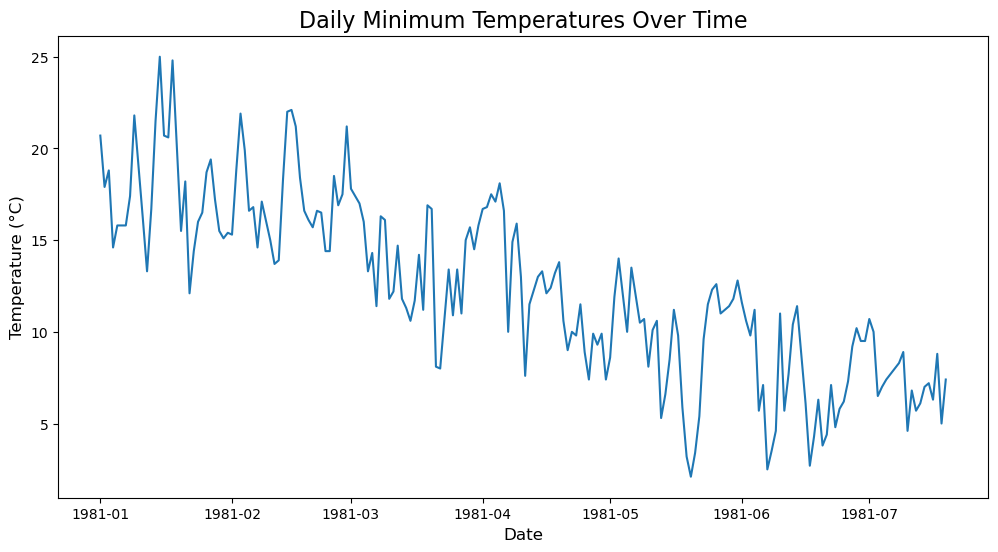

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=df_temperatures['Date'],  
    y=df_temperatures['Daily minimum temperatures'][:200],
)

# Customize the plot
plt.title('Daily Minimum Temperatures Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)



plt.show()

<Axes: >

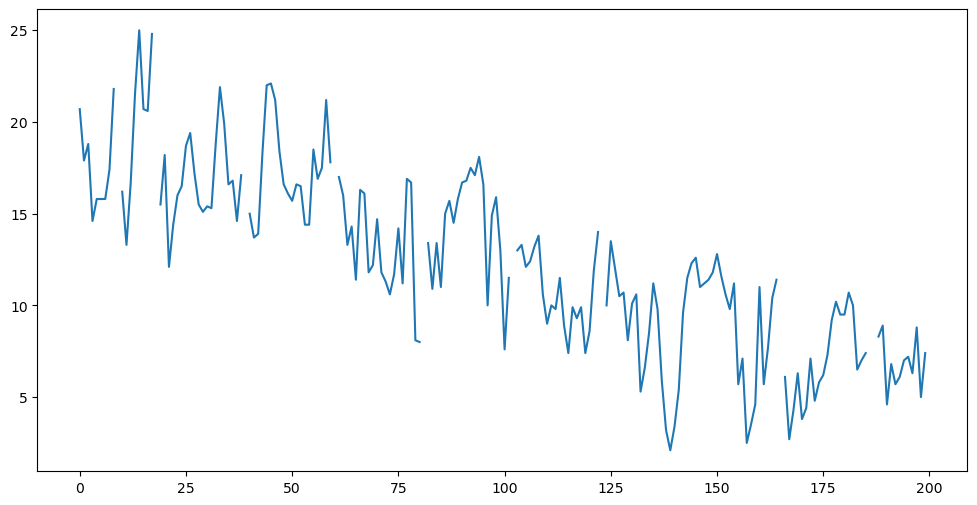

In [84]:
plt.figure(figsize=(12, 6))
df_temperatures['Daily minimum temperatures'][:200].plot()

In [85]:
df_temperatures.isnull().sum()



Date                           0
Daily minimum temperatures    12
dtype: int64

<Axes: >

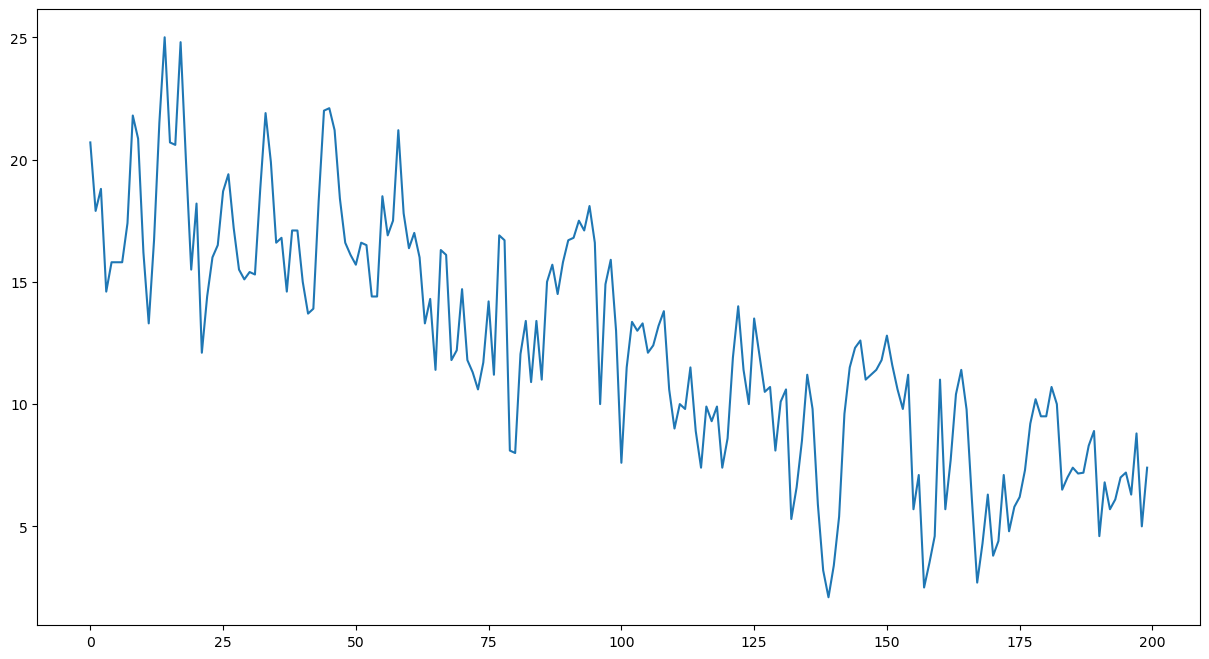

In [86]:
df_temperatures['Daily minimum temperatures'].interpolate(method='polynomial', order=3, inplace=True)
plt.figure(figsize=(15,8))
df_temperatures['Daily minimum temperatures'][:200].plot()

In [89]:
df_Iris=sns.load_dataset("Iris")
df_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [90]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


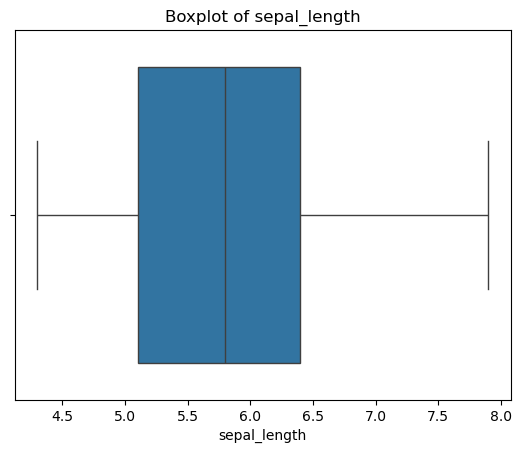

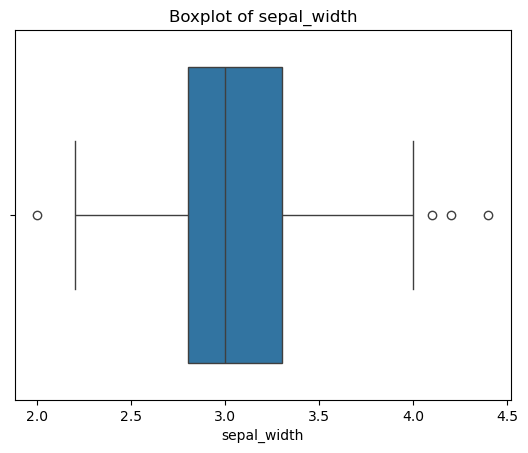

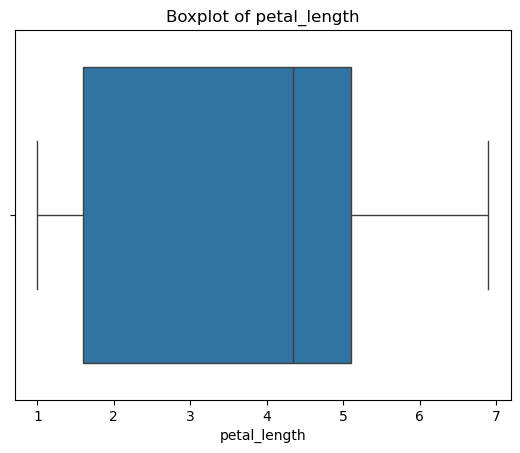

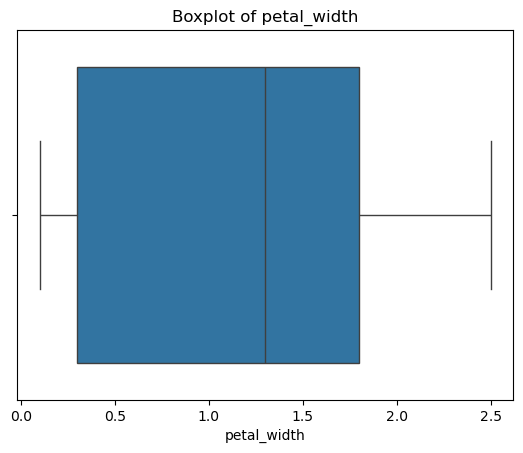

In [92]:
for col in df_Iris.select_dtypes("number").columns:
    sns.boxplot(x=df_Iris[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [95]:

Q1 = df_Iris['sepal_width'].quantile(0.25)
Q3 = df_Iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_Iris[(df_Iris['sepal_width'] < lower_bound) | (df_Iris['sepal_width'] > upper_bound)]

print(lower_bound)
print(upper_bound)
print("Outliers            :")
print(outliers[['sepal_width']])

2.05
4.05
Outliers            :
    sepal_width
15          4.4
32          4.1
33          4.2
60          2.0


In [97]:
df_IBM = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_IBM

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [99]:
df_IBM.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)